<a href="https://colab.research.google.com/github/ssosoo/2024_DS60/blob/main/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8_%EC%86%90%EA%B8%80%EC%94%A8_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

**교차 검증**


 모델 정확도를 파악하기 위해, 성능 검사에 필요한 cross_val_score()를 사용해 교차 검증을 cv=10번 수행 후 10번의 검증 정확도를 리스트에 저장한다.

In [3]:
def cross_validation(classifier, features, labels):
  cv_scores = []
  for i in range(10):
    scores = cross_val_score(classifier, features, labels,
                             cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
  return cv_scores

In [4]:
#의사결정 트리의 손글씨 검증 정확도 저장
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(),
                                features, labels)

In [5]:
#랜덤 포레스트의 손글씨 검증 정확도 저장
rf_cv_scores = cross_validation(RandomForestClassifier(),
                                features, labels)

**정확도 시각화**

<Axes: >

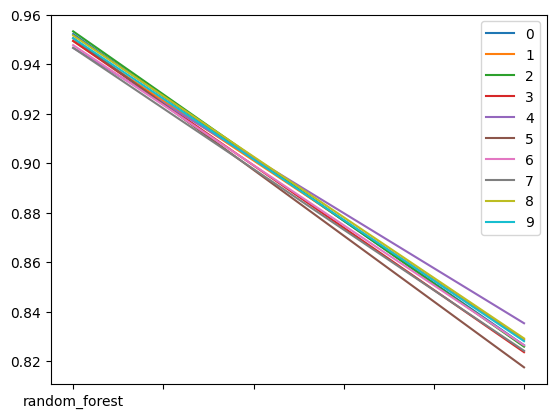

In [16]:
cv_list = [
    ['random_forest', rf_cv_scores],
    ['decision_tree', dt_cv_scores]
    ]

df = pd.DataFrame(dict(cv_list)).T
df.columns = range(len(df.columns))
df.plot()

<Axes: >

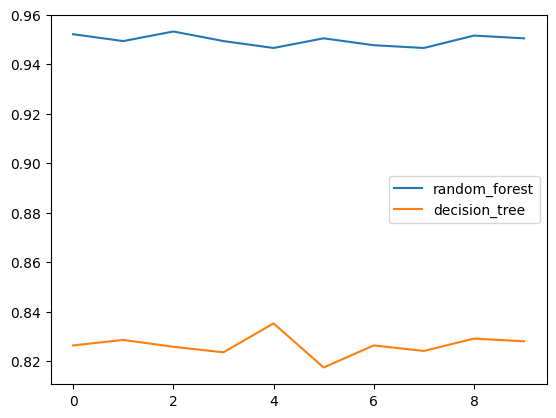

In [17]:
df = pd.DataFrame({
   'random_forest': rf_cv_scores,
   'decision_tree': dt_cv_scores
})

df.plot()

In [18]:
#정확도
np.mean(dt_cv_scores)

0.8264692737430167